## Steps for building a Machine learning model

1. Get data ready turn it from any type it's into tensors `torchvision.transforms` `torch.utils.data.Dataset` `torch.utils.data.Dataloader`
2. Build or pick a pretrained model(that suits your program) `torch.nn`, `torch.nn.Module`, `torchvision.models`,"Pick an Optimzer and Loss function", "Building a training loop and testing loop"
3. Fit the model to the training data and make a prediction 
4. Evaluate the model with suitable evaluation metrics `torch.metrics`
5. Improve your model throw exprmentation "Define your model's problem then find a way to solve it" `torch.utils.tesnorboard`
6. save and load your model to deploy it in real application `torch.save`, `torch.load`

## PyTorch Computer vision
* `torchvision` -base domain library for PyTorch computer vision.
* `torchvision.datasets` - get datasetes and data loading function for computer vision.
* `torchvision.models` -get pretrained models that you can leverage for your own problems.
* `torchvision.tranforms` - functions for manipulating your vision data(images) to be suitable for use with an ML model.
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.Dataloader` -Creates a Python iterable over a dataset

In [5]:
#import important dependencies

# import torch
import torch
from torch import nn
from torch.utils.data import DataLoader
# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib
import matplotlib.pyplot as plt


In [6]:
# Checking for versions 
print(torch.__version__)
print(torchvision.__version__)

2.1.1+cu121
0.16.1+cu121


In [7]:
# 1.getting a dataset 
train_data = datasets.FashionMNIST(root="./FashonMNIST/train_data", # Where to download the data
                                    train = True, # getting training data if True else getting the testing data only
                                    download= False, # downloading the data
                                    transform= torchvision.transforms.ToTensor(),#transforming the datainto tensors True/False,  # How do we want to transform the data ?
                                    target_transform=None, # How do we want to tranform the labels/targets ?
                                    )
test_data = datasets.FashionMNIST(root = "./FashonMNIST/test_data", # Where to download the data
                                    train = False, # getting training data if True else getting the testing data only
                                    download= False, # downloading the data
                                    transform= torchvision.transforms.ToTensor(),#transforming the datainto tensors True/False,  # How do we want to transform the data ?
                                    target_transform=None, # How do we want to tranform the labels/targets ?
                                    )

In [8]:
len(train_data), len(test_data)

(60000, 10000)

In [9]:
img, label = train_data[0]

img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [10]:
img.shape

torch.Size([1, 28, 28])

In [11]:
class_names = train_data.classes

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

(-0.5, 27.5, 27.5, -0.5)

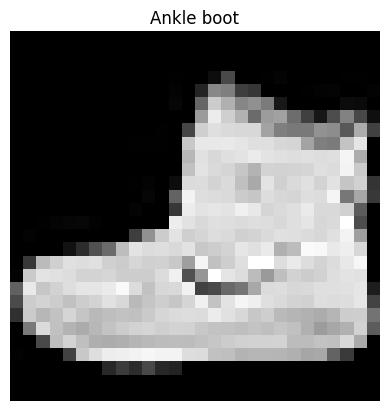

In [12]:
# plot an image
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis("off")

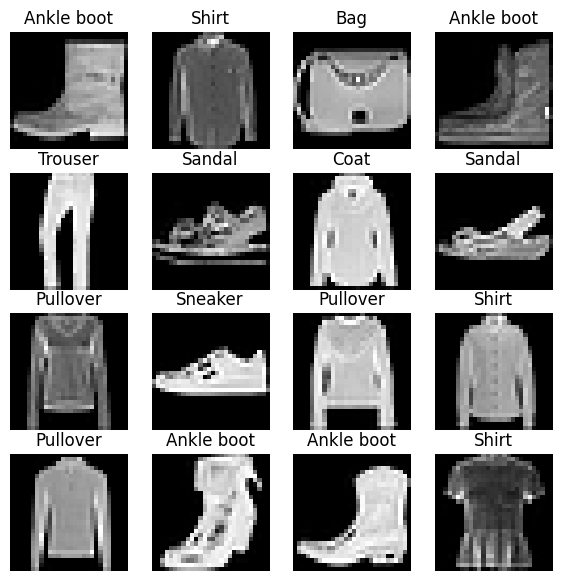

In [13]:
#plotting random samples of our data 
torch.manual_seed(42)
fig = plt.figure(figsize=(7, 7))
rows, colms = 4, 4
for i in range(1, rows*colms + 1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, colms, i)
    plt.imshow(img.squeeze(), cmap = 'gray')
    plt.title(class_names[label])
    plt.axis('off')

In [14]:
from torch.utils.data import DataLoader

### 2.prepare our data and turn it into dataloaders

- Right now our data is in the form of PyTorch Datasets.
- Dataloader turns our dataset into a Python iterable 
- More specifically we want to turn our data into minibatches 

In [15]:
torch.manual_seed(42)
train_data_loader =  DataLoader(train_data,
                                batch_size = 32,
                                shuffle = True,
                                        )

test_data_loader = DataLoader( test_data,
                               batch_size = 32,
                               shuffle = False
                               )

In [16]:
print(f"DataLoaders : {train_data_loader, test_data_loader}")
print(f"Length of train_loader : {len(train_data_loader)} and Batches of {train_data_loader.batch_size}")
print(f"| Length of test_loader {len(test_data_loader)} and Batches of {test_data_loader.batch_size}")

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x0000013430715A90>, <torch.utils.data.dataloader.DataLoader object at 0x0000013430623310>)
Length of train_loader : 1875 and Batches of 32
| Length of test_loader 313 and Batches of 32


In [17]:
#show a sample of the dataloader "how to interact with the data loader"
#checking what is inside the train data loader
train_features_batch, train_label_batch = next(iter(train_data_loader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

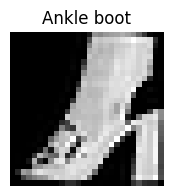

In [18]:
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]

plt.figure(figsize = (2,2))
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis("off")


## 3. Make a base line Model

this is the base line model that we are going to improve and updata upon it 

In [19]:
class FashonMNISTModelv1(nn.Module):
    def __init__(self, 
                 input_shape,
                 hidden_units,
                 output_shape) -> None:
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            #nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=hidden_units),
            #nn.ReLU(),
            nn.Linear(in_features= hidden_units,
                      out_features= output_shape),
            #nn.Softmax()
        )
    def forward(self, x : torch.tensor) -> torch.tensor:
        return self.layer_stack(x)

In [20]:
class_0 = FashonMNISTModelv1(
    input_shape= 28 * 28,
    hidden_units=10,
    output_shape = 10
).to("cpu")

class_0

FashonMNISTModelv1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
# Downloading helper function from learnpytorch
import requests
from pathlib import Path

path = Path("helper_functions.py")


In [22]:
if path.exists() == True:
    print(f"The file {path.name} already exists you can import it directly using import {path.name.replace('.py', '')}")
else:
    print(f"Downloading the file {path.name}")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open(path.name, "wb") as f :
        f.write(request.content)

The file helper_functions.py already exists you can import it directly using import helper_functions


In [23]:
import helper_functions

In [24]:
loss_fnc = nn.CrossEntropyLoss()

optimzer = torch.optim.SGD(params=class_0.parameters(), lr = 0.01)


In [25]:
dummy_x = torch.rand([1, 1, 28, 28])
dummy_x

tensor([[[[0.0237, 0.1837, 0.2798, 0.2174, 0.0621, 0.8123, 0.9890, 0.9186,
           0.8131, 0.7220, 0.3029, 0.0965, 0.2047, 0.7264, 0.6094, 0.5638,
           0.1965, 0.2648, 0.2891, 0.4365, 0.4057, 0.5529, 0.3335, 0.4433,
           0.1820, 0.7471, 0.0845, 0.5913],
          [0.0243, 0.2149, 0.9835, 0.4064, 0.4081, 0.7579, 0.0687, 0.3848,
           0.4839, 0.5563, 0.4172, 0.1473, 0.0417, 0.5054, 0.9175, 0.2755,
           0.5632, 0.8178, 0.0115, 0.9425, 0.9223, 0.2813, 0.9358, 0.8416,
           0.9154, 0.9330, 0.6147, 0.7747],
          [0.2323, 0.5840, 0.9795, 0.3277, 0.6178, 0.2445, 0.6848, 0.6628,
           0.8775, 0.5028, 0.7387, 0.8031, 0.5805, 0.0283, 0.8545, 0.1798,
           0.7316, 0.1259, 0.6456, 0.4064, 0.0522, 0.7283, 0.3837, 0.2919,
           0.3446, 0.8400, 0.7938, 0.6362],
          [0.7092, 0.7568, 0.7069, 0.9257, 0.8011, 0.2427, 0.4238, 0.7332,
           0.8978, 0.0845, 0.2520, 0.2520, 0.9723, 0.9908, 0.2765, 0.3455,
           0.5089, 0.5293, 0.3575, 0.1352, 

In [26]:
class_0(dummy_x)

tensor([[ 0.4610, -0.3953, -0.0013,  0.2377, -0.0399, -0.3302,  0.1992,  0.0818,
         -0.1059, -0.3474]], grad_fn=<AddmmBackward0>)

## Creating a training loop and training a model on batches of data

1. loop through epochs.
2. loop through training batches, perform training steps per batch, calculate train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. print what's happening 

In [27]:
from helper_functions import accuracy_fn

In [28]:
# Import tqdm for progress bar 
from tqdm.auto import tqdm

# Set the seed 
torch.manual_seed(42)

# set the number of epochs keeping it small for faster training
epochs = 3

# Creat training and testing loop 
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n-----")
    # Training 
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_data_loader):
        # Model train
        class_0.train()
        # Do the forward Path
        y_preds = class_0(X)
        #calculate the loss
        loss = loss_fnc(y_preds, y)
        train_loss += loss
        # optimzer zero grad
        optimzer.zero_grad()
        # loss backward
        loss.backward()
        # optimzer step
        optimzer.step()
    # Print out what's happening 
        if batch % 400 == 0 :
            print(f"Looked at batch {batch * len(X)}/{len(train_data_loader.dataset)} Samples.")
    
    # Dividing total train loss by length of train dataloader
    train_loss /= len(train_data_loader)
    ### Testing 
    test_loss, test_acc = 0, 0
    # model.eval()
    class_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_data_loader:
            # 1. do the forward path
            predictions = class_0(X_test)
            # claculate the loss
            test_loss += loss_fnc(predictions, y_test)
            #calculate the test accuracy
            test_acc += accuracy_fn(y_true= y_test,
                                    y_pred = predictions.argmax(dim = 1))
        #calculate the average test loss "loss per epoch"
        test_loss /= len(test_data_loader)  
        #calculate the average test accuracy "accuracy per epoch"
        test_acc /= len(test_data_loader)
    # Print out what's happening 
    print(f"\n Train loss : {train_loss:.4f}, Test loss : {test_loss:.4f}, Test accuracy : {test_acc:.2f}") 

c:\Users\omarm\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
-----
Looked at batch 0/60000 Samples.


Looked at batch 12800/60000 Samples.
Looked at batch 25600/60000 Samples.
Looked at batch 38400/60000 Samples.
Looked at batch 51200/60000 Samples.


 33%|███▎      | 1/3 [00:11<00:22, 11.39s/it]


 Train loss : 0.9684, Test loss : 0.6665, Test accuracy : 75.97
Epoch : 1
-----
Looked at batch 0/60000 Samples.
Looked at batch 12800/60000 Samples.
Looked at batch 25600/60000 Samples.
Looked at batch 38400/60000 Samples.
Looked at batch 51200/60000 Samples.


 67%|██████▋   | 2/3 [00:21<00:10, 10.80s/it]


 Train loss : 0.5859, Test loss : 0.5642, Test accuracy : 79.97
Epoch : 2
-----
Looked at batch 0/60000 Samples.
Looked at batch 12800/60000 Samples.
Looked at batch 25600/60000 Samples.
Looked at batch 38400/60000 Samples.
Looked at batch 51200/60000 Samples.


100%|██████████| 3/3 [00:32<00:00, 10.85s/it]


 Train loss : 0.5213, Test loss : 0.5302, Test accuracy : 81.16


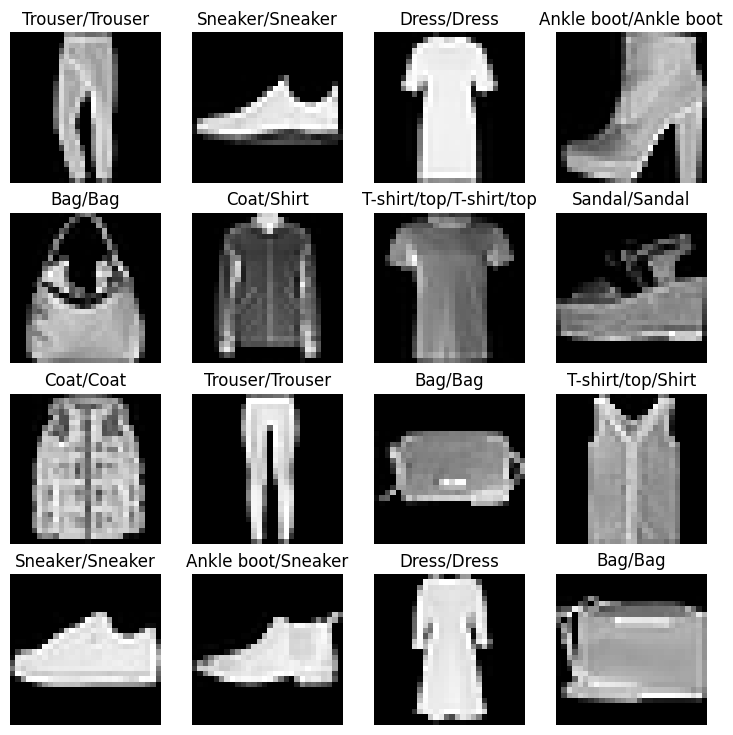

In [29]:
#plotting random samples of our data 
torch.manual_seed(1)
fig = plt.figure(figsize=(9, 9))
rows, colms = 4, 4
for i in range(1, rows*colms + 1):
    random_idx = torch.randint(0, len(test_data), size = [1]).item()
    img, label = test_data[random_idx]
    pred_label = class_0(img).argmax(dim = 1)
    fig.add_subplot(rows, colms, i)
    plt.imshow(img.squeeze(), cmap = 'gray')
    plt.title(f"{class_names[label]}/{class_names[pred_label]}")
    plt.axis('off')

In [30]:
# Functionalize Our evaluation method

def eval_model(model : torch.nn.Module,
               data_loader : DataLoader,
               loss_fnc : torch.nn.Module,
               accuracy_fn
               ):
    """ Returns a dictionary containing the results of model predicitons on data_loader """
    loss, accuracy = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            #Make predicitons
            y_preds = model(X)

            #Accumelate the loss and accuracy values per batch
            loss += loss_fnc(y_preds, y)
            accuracy += accuracy_fn(y, y_preds.argmax(dim = 1))
        # Scaling the loss and accuracy to find loss and accuracy per epoch
        loss /= len(data_loader)
        accuracy /= len(data_loader)
    return {"model_name" : model.__class__.__name__,
            "model_loss" : loss.item(),
            "model_accuracy" : accuracy}

In [31]:
model_0_results = eval_model(model = class_0,
                             data_loader = test_data_loader,
                             loss_fnc = loss_fnc,
                             accuracy_fn= accuracy_fn,
                             )
model_0_results

100%|██████████| 313/313 [00:01<00:00, 217.29it/s]


{'model_name': 'FashonMNISTModelv1',
 'model_loss': 0.5302413105964661,
 'model_accuracy': 81.16014376996804}

## Improving our Model using Convolution Neural Networks

In [32]:
# and lets train our model on the GPU instead of the CPU

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [127]:
class FashionMNISTv2(nn.Module):
    def __init__(self,
                Input_shape:int,
                hidden_uints:int,
                output_shape: int,
                activation = nn.ReLU()):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = Input_shape,
                      out_features = hidden_uints),
            activation,
            nn.Linear(in_features = hidden_uints,
                      out_features = output_shape),
            activation,
        )
        
    def forward(self, x : torch.tensor) -> torch.tensor:
        return self.layer_stack(x)
    

In [115]:
INPUT_SHAPE = dummy_x.shape[2] * dummy_x.shape[3] # dummy_x is a sample img with the same dimension of the actual images
OUTPUT_SHAPE = len(class_names)
HIDDEN_UNITS = 10

In [128]:
# Instaintiate and setting a manual seed
torch.manual_seed(42)

model_1 = FashionMNISTv2(Input_shape= INPUT_SHAPE,
                         output_shape= OUTPUT_SHAPE,
                         hidden_uints= HIDDEN_UNITS).to(device=device)

In [129]:
model_1, next(model_1.parameters()).device

(FashionMNISTv2(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ),
 device(type='cuda', index=0))

In [130]:
# Creating loss function and optimzer for our new model and they will be the same as the previous model
loss_fnc = nn.CrossEntropyLoss()

optimzer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

### Functionizing training and testing loops
let's create a function for:
1. training loop and call it `train_step()`
2. testing loop and call it `test_step()`

In [38]:
def train_step(model:nn.Module,
               data_loader : DataLoader,
               loss_fnc : torch.nn.Module,
               optimzer : torch.optim.Optimizer,
               accuracy_fn,
               target_device :torch.device = device):
    """ Perform a training step with model trying to learn on data_loader"""
    train_loss, train_acc = 0, 0
    # Model train
    model.train()
    # Add a loop to loop through the training batches
    for X, y in data_loader:
        # Sending our data into the used device "GPU or CPU"
        X, y = X.to(target_device), y.to(target_device)
        # Do the forward Path
        y_pred = model(X)

        #calculate the loss
        loss = loss_fnc(y_pred, y)
        train_loss += loss

        #Calculating the training accuracy
        train_acc += accuracy_fn(y, y_pred.argmax(dim = 1))

        # optimzer zero grad
        optimzer.zero_grad()

        # loss backward
        loss.backward()

        # optimzer step
        optimzer.step()
    
    # Dividing total train loss and train accuracy by length of train dataloader to get training loss and training accuracy per batch
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    # Print out what's happening 
    print(f"Train Loss : {train_loss:.2f} | Train accuracy : {train_acc:.2f}%")

In [39]:
def test_step(
             model : torch.nn.Module,
             data_loader : DataLoader,
             loss_fnc :torch.nn.Module,
             accuracy_fn,
             target_device : torch.device = device):
    """ Performs a testing loop step on model going over data_loader. """
    test_loss, test_acc = 0, 0
    # Put our model in evaluation mode 
    model.eval()
    # Turn on inference mode
    with torch.inference_mode():
        for X, y in tqdm(data_loader):

            # Send the data to the target device
            X, y = X.to(target_device), y.to(target_device)

            # 1. Do the forward Path
            test_pred = model(X)

            # 2. Calculate the loss and test accuracy
            test_loss += loss_fnc(test_pred, y)
            test_acc += accuracy_fn(y, test_pred.argmax(dim = 1))
        # 3. Calculate the average loss and accuracy through the batch
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        # 4. Printing out what's happening
        print(f"Test Loss : {test_loss:.4f} | Test accuracy : {test_acc:.2f}%\n")

In [40]:
def train(model : torch.nn.Module,
          train_data_loader : DataLoader,
          test_data_loader : DataLoader,
          loss_fnc : torch.nn.Module,
          optimzer :torch.optim.Optimizer,
          accuracy_fn,
          epochs : int,
          target_device : torch.device = device):
    

    """ Do the train step Function and the test step function in a range of epochs"""
    for epoch in range(epochs):
      # doing the training step
      train_step(model, train_data_loader,loss_fnc, optimzer, accuracy_fn, target_device)
      # doint the testing step
      test_step(model, test_data_loader, loss_fnc, accuracy_fn, target_device)

In [131]:
train(model_1, train_data_loader, test_data_loader, loss_fnc, optimzer, accuracy_fn, epochs= 10)

Train Loss : 1.06 | Train accuracy : 62.19%


100%|██████████| 313/313 [00:01<00:00, 215.98it/s]


Test Loss : 0.9951 | Test accuracy : 64.13%

Train Loss : 0.91 | Train accuracy : 66.32%


100%|██████████| 313/313 [00:01<00:00, 209.79it/s]


Test Loss : 0.9574 | Test accuracy : 65.47%

Train Loss : 0.88 | Train accuracy : 67.25%


100%|██████████| 313/313 [00:01<00:00, 217.03it/s]


Test Loss : 0.8910 | Test accuracy : 67.05%

Train Loss : 0.86 | Train accuracy : 67.78%


100%|██████████| 313/313 [00:01<00:00, 197.06it/s]


Test Loss : 0.8766 | Test accuracy : 66.91%

Train Loss : 0.85 | Train accuracy : 67.99%


100%|██████████| 313/313 [00:01<00:00, 224.13it/s]


Test Loss : 0.8717 | Test accuracy : 66.87%

Train Loss : 0.84 | Train accuracy : 68.35%


100%|██████████| 313/313 [00:01<00:00, 207.00it/s]


Test Loss : 0.8902 | Test accuracy : 66.55%

Train Loss : 0.83 | Train accuracy : 68.61%


100%|██████████| 313/313 [00:01<00:00, 235.81it/s]


Test Loss : 0.8576 | Test accuracy : 67.77%

Train Loss : 0.76 | Train accuracy : 71.38%


100%|██████████| 313/313 [00:01<00:00, 255.52it/s]


Test Loss : 0.6920 | Test accuracy : 75.15%

Train Loss : 0.63 | Train accuracy : 76.58%


100%|██████████| 313/313 [00:01<00:00, 222.63it/s]


Test Loss : 0.6840 | Test accuracy : 74.47%

Train Loss : 0.62 | Train accuracy : 76.95%


100%|██████████| 313/313 [00:01<00:00, 237.81it/s]

Test Loss : 0.6596 | Test accuracy : 75.96%



# Putting every thing together in one class

In [120]:
class MyFirstCompeleteModel(nn.Module):
    def __init__(self,
                input_shape :int,
                output_shape :int,
                hidden_units : int,
                activation = nn.ReLU()):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape,
                      out_features = hidden_units),
            activation,
            nn.Linear(in_features = hidden_units,
                      out_features = output_shape),
            activation,
        )
    
    def train_step(self,
               data_loader : DataLoader,
               loss_fnc : torch.nn.Module,
               optimzer : torch.optim.Optimizer,
               accuracy_fn,
               target_device :torch.device = device):
        """ Perform a training step with model trying to learn on data_loader"""
        train_loss, train_acc = 0, 0
        # Model train
        self.train()
        # Add a loop to loop through the training batches
        for X, y in data_loader:
            # Sending our data into the used device "GPU or CPU"
            X, y = X.to(target_device), y.to(target_device)
            # Do the forward Path
            y_pred = self(X)

            #calculate the loss
            loss = loss_fnc(y_pred, y)
            train_loss += loss

            #Calculating the training accuracy
            train_acc += accuracy_fn(y, y_pred.argmax(dim = 1))

            # optimzer zero grad
            optimzer.zero_grad()

            # loss backward
            loss.backward()

            # optimzer step
            optimzer.step()
        
        # Dividing total train loss and train accuracy by length of train dataloader to get training loss and training accuracy per batch
        train_loss /= len(data_loader)
        train_acc /= len(data_loader)
        # Print out what's happening 
        print(f"Train Loss : {train_loss:.2f} | Train accuracy : {train_acc:.2f}%")

    def test_step(
             self,
             data_loader : DataLoader,
             loss_fnc :torch.nn.Module,
             accuracy_fn,
             target_device : torch.device = device):
        """ Performs a testing loop step on model going over data_loader. """
        test_loss, test_acc = 0, 0
        # Put our model in evaluation mode 
        self.eval()
        # Turn on inference mode
        with torch.inference_mode():
            for X, y in tqdm(data_loader):

                # Send the data to the target device
                X, y = X.to(target_device), y.to(target_device)

                # 1. Do the forward Path
                test_pred = self(X)

                # 2. Calculate the loss and test accuracy
                test_loss += loss_fnc(test_pred, y)
                test_acc += accuracy_fn(y, test_pred.argmax(dim = 1))
            # 3. Calculate the average loss and accuracy through the batch
            test_loss /= len(data_loader)
            test_acc /= len(data_loader)
            # 4. Printing out what's happening
            print(f"Test Loss : {test_loss:.4f} | Test accuracy : {test_acc:.2f}%\n")

    def train_model(self,
          train_data_loader : DataLoader,
          test_data_loader : DataLoader,
          loss_fnc : torch.nn.Module,
          optimzer :torch.optim.Optimizer,
          accuracy_fn,
          epochs : int,
          target_device : torch.device = device):
    
        """ Do the train step Function and the test step function in a range of epochs"""
        for epoch in range(epochs):
        # doing the training step
            self.train_step(train_data_loader,loss_fnc, optimzer, accuracy_fn, target_device)
        # doint the testing step
            self.test_step(test_data_loader, loss_fnc, accuracy_fn, target_device)

    def eval_model(self,
               data_loader : DataLoader,
               loss_fnc : torch.nn.Module,
               accuracy_fn,
               target_device: torch.device = device):
        """ Returns a dictionary containing the results of model predicitons on data_loader """
        loss, accuracy = 0, 0
        self.eval()
        with torch.inference_mode():
            for X, y in tqdm(data_loader):
                # Send the data to the target device
                X, y = X.to(target_device), y.to(target_device)
                #Make predicitons
                y_preds = self(X)

                #Accumelate the loss and accuracy values per batch
                loss += loss_fnc(y_preds, y)
                accuracy += accuracy_fn(y, y_preds.argmax(dim = 1))

            # Scaling the loss and accuracy to find loss and accuracy per epoch
            loss /= len(data_loader)
            accuracy /= len(data_loader)
        return {"model_name" : self.__class__.__name__,
                "model_loss" : loss.item(),
                "model_accuracy" : accuracy}
    
    def forward(self, x : torch.tensor) -> torch.tensor:
        return self.layer_stack(x)

In [132]:
model_2 = MyFirstCompeleteModel(input_shape= INPUT_SHAPE,
                                output_shape= OUTPUT_SHAPE,
                                hidden_units=HIDDEN_UNITS).to(device)
model_2

MyFirstCompeleteModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [133]:
# Creating loss function and optimzer for our new model and they will be the same as the previous model
loss_fnc = nn.CrossEntropyLoss()

optimzer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

In [134]:
model_2.train_model(train_data_loader = train_data_loader,
              test_data_loader = test_data_loader,
              loss_fnc = loss_fnc,
              optimzer = optimzer,
              accuracy_fn = accuracy_fn,
              epochs = 5)

Train Loss : 0.99 | Train accuracy : 67.87%


100%|██████████| 313/313 [00:01<00:00, 196.58it/s]


Test Loss : 0.8036 | Test accuracy : 71.95%

Train Loss : 0.73 | Train accuracy : 73.48%


100%|██████████| 313/313 [00:01<00:00, 221.30it/s]


Test Loss : 0.7179 | Test accuracy : 73.99%

Train Loss : 0.70 | Train accuracy : 74.43%


100%|██████████| 313/313 [00:01<00:00, 213.65it/s]


Test Loss : 0.7399 | Test accuracy : 73.42%

Train Loss : 0.68 | Train accuracy : 75.08%


100%|██████████| 313/313 [00:01<00:00, 241.75it/s]


Test Loss : 0.6912 | Test accuracy : 74.53%

Train Loss : 0.67 | Train accuracy : 75.33%


100%|██████████| 313/313 [00:01<00:00, 233.96it/s]

Test Loss : 0.7118 | Test accuracy : 74.12%



In [136]:
model_2.eval_model(test_data_loader, loss_fnc, accuracy_fn)

100%|██████████| 313/313 [00:01<00:00, 198.94it/s]


{'model_name': 'MyFirstCompeleteModel',
 'model_loss': 0.7117738127708435,
 'model_accuracy': 74.12140575079871}

# Saving and Loading our Model 

In [137]:
from pathlib import Path
# creating the model directory 
Model_path = Path("models")
Model_path.mkdir(parents=True, exist_ok= True)
# create model save path 
MODEL_NAME = "03_Computer_vision_Pytorch.pth"
MODEL_SAVE_PATH = Model_path / MODEL_NAME
# saving model 
print(f"saving model to : {MODEL_SAVE_PATH} ")
torch.save(model_2.state_dict(), MODEL_SAVE_PATH)

saving model to : models\03_Computer_vision_Pytorch.pth 


In [140]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
my_loaded_model = MyFirstCompeleteModel(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, hidden_units=HIDDEN_UNITS)

my_loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [143]:
my_loaded_model.to(device)
my_loaded_model.eval_model(test_data_loader, loss_fnc, accuracy_fn)

100%|██████████| 313/313 [00:01<00:00, 197.99it/s]


{'model_name': 'MyFirstCompeleteModel',
 'model_loss': 0.7117738127708435,
 'model_accuracy': 74.12140575079871}